https://brew.sh/

In [1]:
!pip3 install opencv-python

In [2]:
!pip3 install opencv-contrib-python==3.4.2.16

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==3.4.2.16 (from versions: 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48)
ERROR: No matching distribution found for opencv-contrib-python==3.4.2.16


In [3]:
!pip3 install scikit-image

     |████████████████████████████████| 30.2 MB 30.9 MB/s eta 0:00:01
     |████████████████████████████████| 165 kB 21.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 21.7 MB/s eta 0:00:01


In [4]:
!pip3 install Image

     |████████████████████████████████| 7.9 MB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.2 MB/s  eta 0:00:01
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19485 sha256=bf3f27229c0781c16d3d8a4030115737a58c23fff3a12ffba3a44fc3d2e8f3bf
  Stored in directory: /home/ubuntu/.cache/pip/wheels/ac/30/5c/a8b33888bea3507eda7c924a143d34b2390d2ca5b145b327b5
Successfully built Image


In [5]:
!pip3 install scipy

### **Image transformation**

__An image transform can be applied to an image to convert it from one domain to another. Viewing an image in domains such as frequency or Hough space enables the identification of features that may not be as easily detected in the spatial domain. Common image transforms include:__

### Import libraries

In [6]:
import skimage
import cv2
import numpy as np

from PIL import Image, ImageFilter
from sklearn.feature_extraction import image

import matplotlib.pyplot as plt

### Load and read image data from our local disk

https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/

Image source: https://unsplash.com/photos/Vkau25v1L5Q

In [7]:
img_stork = Image.open('datasets/bird.jpeg')

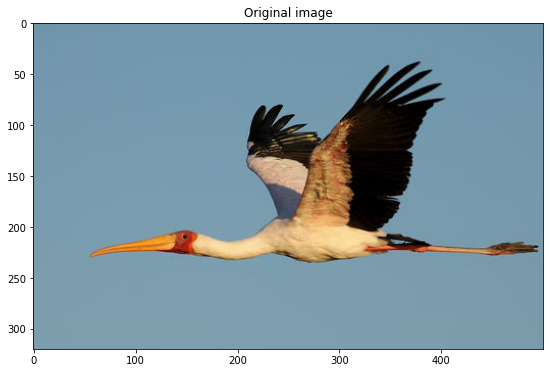

In [8]:
plt.figure(figsize=(12, 6))

plt.imshow(img_stork)
plt.title('Original image')
plt.show()

### Format of image

In [9]:
img_stork.format, img_stork.mode, img_stork.size

('JPEG', 'RGB', (500, 320))

### Convert into grayscale
Grayscale images are smaller in size and may be enough for your image processing tasks

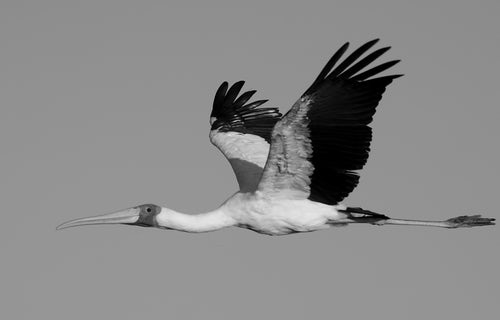

In [10]:
gs_image = img_stork.convert(mode='L')

gs_image

In [11]:
gs_image.size

(500, 320)

### Resize
* __By using thumbnail__

To feed a large number of images into ML models, you will need to standardize their sizes

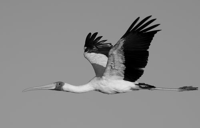

In [12]:
gs_image.thumbnail((200, 200))

gs_image

In [13]:
gs_image.size, img_stork.size

((200, 128), (500, 320))

* __By using resize function__

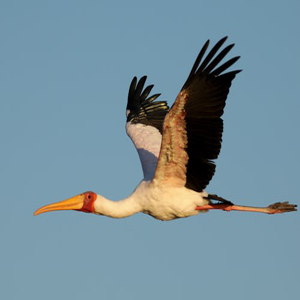

In [14]:
img_resize = img_stork.resize((300, 300))

img_resize

In [15]:
img_resize.size

(300, 300)

## Flip image

### Original image

In [16]:
hoz_flip = img_stork.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip = img_stork.transpose(Image.FLIP_TOP_BOTTOM)

### Horizontal flip

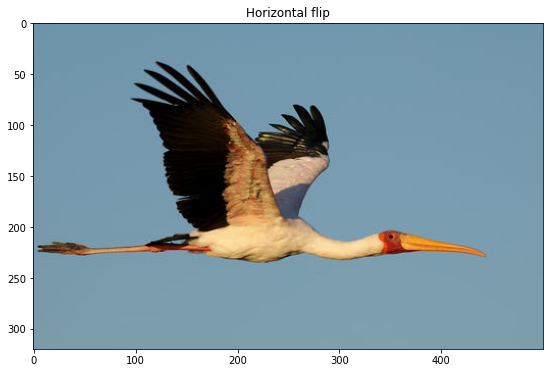

In [17]:
plt.figure(figsize=(12, 6))
plt.title('Horizontal flip')
plt.imshow(hoz_flip)

plt.show()

### Vertical flip

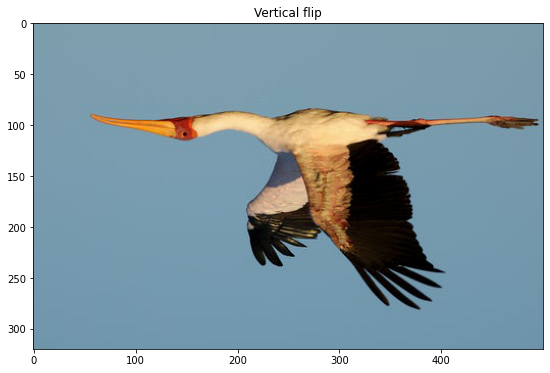

In [18]:
plt.figure(figsize=(12, 6))
plt.title('Vertical flip')
plt.imshow(ver_flip)

plt.show()

### Converted the original image into numpy N-D arrays

In [19]:
img_stork_arr = np.array(img_stork)

type(img_stork_arr)

numpy.ndarray

### Shape of N-D array

In [20]:
img_stork_arr.shape

(320, 500, 3)

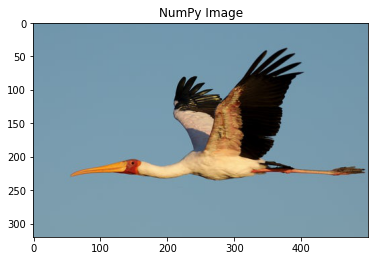

In [21]:
plt.figure (figsize = (6, 6))
plt.title("NumPy Image")
plt.imshow(img_stork_arr, cmap = 'gray')

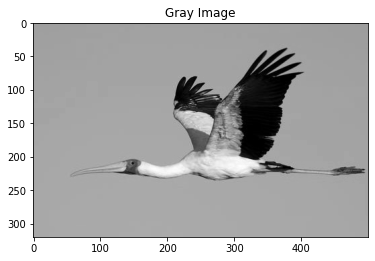

In [22]:
from skimage.color import rgb2gray

img_stork_arr_gray = rgb2gray(img_stork_arr)

plt.figure (figsize = (6,6))
plt.title("Gray Image")
plt.imshow(img_stork_arr_gray, cmap = 'gray')

In [23]:
img_stork_arr_gray.shape

(320, 500)

#### View a part of the array
Each of the 20 cells here is itself a list of 3 elements representing the 3 channels of the color image

In [24]:
img_stork_arr[100][200:220]

array([[118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [122, 155, 172],
       [114, 151, 170],
       [117, 159, 181],
       [115, 157, 179],
       [120, 155, 174],
       [118, 142, 154],
       [  0,  10,  16],
       [  0,   1,   4],
       [  7,   6,  11],
       [  6,   7,   9],
       [  7,   9,   8],
       [  8,   9,   4]], dtype=uint8)

In [25]:
img_stork_arr_gray[100][200:220]

array([0.58238196, 0.58238196, 0.58238196, 0.58238196, 0.58238196,
       0.58238196, 0.58238196, 0.58238196, 0.5851498 , 0.56669569,
       0.5947498 , 0.58690667, 0.58404863, 0.54025569, 0.03257882,
       0.00393647, 0.02577647, 0.02718314, 0.03334471, 0.03304706])

In [26]:
from skimage.transform import resize

stork_resized = resize(img_stork_arr, (224, 224), anti_aliasing=True)

stork_resized.shape

(224, 224, 3)

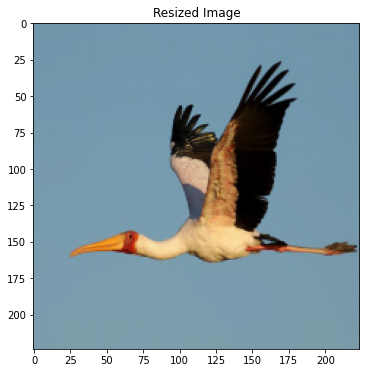

In [27]:
plt.figure (figsize = (6, 6))
plt.title("Resized Image")
plt.imshow(stork_resized, cmap = 'gray')

### Let's looks how many patches in a single image of (64 * 64)

In [28]:
img_stork_arr.shape

(320, 500, 3)

#### Creating patches out of the image
The number of patches = (320-64+1)*(500-64+1) = 112309

In [29]:
patches = image.extract_patches_2d(img_stork_arr, (64, 64))

patches.shape

(112309, 64, 64, 3)

### Visualizing the patches

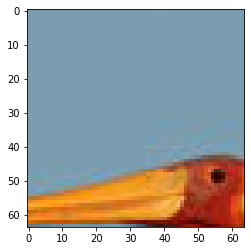

In [30]:
plt.imshow(patches[70450])
plt.show()

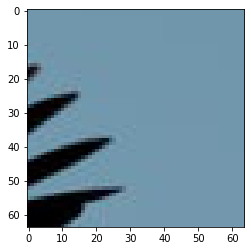

In [31]:
plt.imshow(patches[9990])
plt.show()

### In this example image is taken from skimage dataset library

https://peerj.com/articles/453/

In [32]:
from skimage import data, io, filters

### Load image data from skimage datasets

In [33]:
image = data.coins()
print(image)

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]


### Shape of image

In [34]:
image.shape

(303, 384)

### Original image

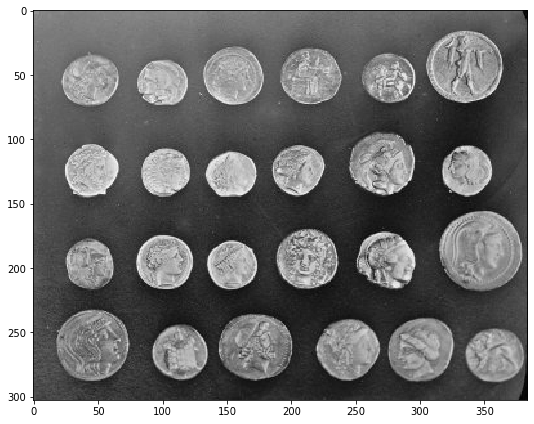

In [35]:
plt.figure(figsize=(12, 6))
io.imshow(image)

plt.show()

### Filter the image by the help of edges

In [36]:
edges = filters.sobel(image)

print(edges)

[[0.22261811 0.22580966 0.04256528 ... 0.01675295 0.00765711 0.0202113 ]
 [0.22752914 0.17208326 0.04307036 ... 0.03683979 0.00765711 0.01180548]
 [0.10007686 0.06139791 0.02499519 ... 0.084638   0.00490196 0.02018751]
 ...
 [0.01386484 0.03114192 0.02949335 ... 0.01669548 0.00588235 0.00876889]
 [0.02752092 0.04030354 0.0335059  ... 0.00571662 0.00980392 0.00438445]
 [0.02941176 0.05787636 0.0417099  ... 0.00490196 0.00876889 0.00554594]]


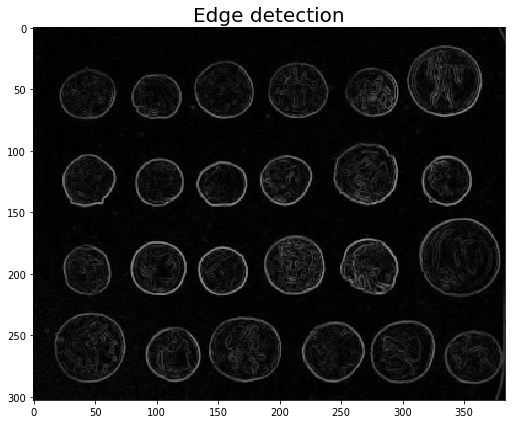

In [37]:
plt.figure(figsize=(12, 6))
plt.title('Edge detection', fontsize=20)
io.imshow(edges)

plt.show()

### Select local maxima

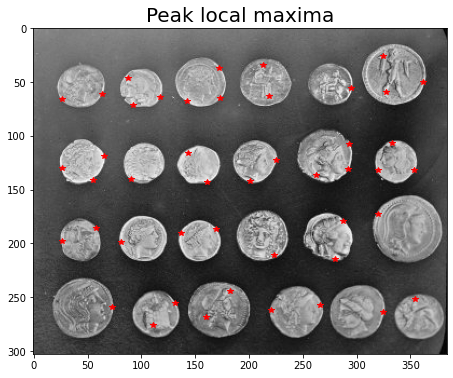

In [38]:
from skimage.feature import peak_local_max

coordinates = peak_local_max(image, min_distance=20)

fig, axes = plt.subplots(figsize=(12, 6))
axes.imshow(image, cmap=plt.cm.gray)

axes.plot(coordinates[:, 1], coordinates[:,0], 'r*')
axes.set_title('Peak local maxima', fontsize=20)

plt.show()

In [39]:
pisa1 = cv2.imread('datasets/leaning_pisa_1.jpg')

pisa1.shape

(426, 640, 3)

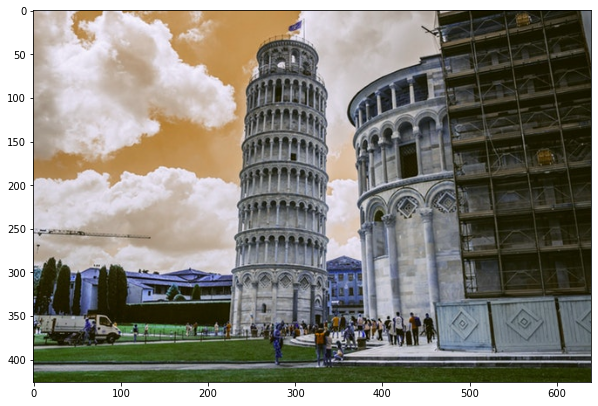

In [40]:
plt.figure(figsize=(10, 10))  

plt.imshow(pisa1)

In [41]:
gray1 = cv2.cvtColor(pisa1, cv2.COLOR_BGR2GRAY)

In [42]:
sift = cv2.xfeatures2d.SIFT_create()

sift

<SIFT 0x7fe94c2fe310>

In [43]:
keypoints1 = sift.detect(gray1, None)

keypoints1

[<KeyPoint 0x7fe8ea827ba0>,
 <KeyPoint 0x7fe8ea827bd0>,
 <KeyPoint 0x7fe8ea80de10>,
 <KeyPoint 0x7fe8ea80de70>,
 <KeyPoint 0x7fe8ea80d360>,
 <KeyPoint 0x7fe8ea80d540>,
 <KeyPoint 0x7fe8ea80ddb0>,
 <KeyPoint 0x7fe8ea80dde0>,
 <KeyPoint 0x7fe8ea80d3c0>,
 <KeyPoint 0x7fe8ea80dd20>,
 <KeyPoint 0x7fe8ea80d4e0>,
 <KeyPoint 0x7fe8ea88a8d0>,
 <KeyPoint 0x7fe8ea88af60>,
 <KeyPoint 0x7fe8ea88a630>,
 <KeyPoint 0x7fe8ea88a6f0>,
 <KeyPoint 0x7fe8ea88a300>,
 <KeyPoint 0x7fe8ea88a090>,
 <KeyPoint 0x7fe8efa930c0>,
 <KeyPoint 0x7fe948073c90>,
 <KeyPoint 0x7fe948073390>,
 <KeyPoint 0x7fe9480732d0>,
 <KeyPoint 0x7fe9480734b0>,
 <KeyPoint 0x7fe9480733c0>,
 <KeyPoint 0x7fe948073480>,
 <KeyPoint 0x7fe948073240>,
 <KeyPoint 0x7fe948073300>,
 <KeyPoint 0x7fe948073270>,
 <KeyPoint 0x7fe948073120>,
 <KeyPoint 0x7fe948073150>,
 <KeyPoint 0x7fe948073180>,
 <KeyPoint 0x7fe9480735d0>,
 <KeyPoint 0x7fe948073030>,
 <KeyPoint 0x7fe948073060>,
 <KeyPoint 0x7fe948073420>,
 <KeyPoint 0x7fe948073510>,
 <KeyPoint 0x7fe9480

In [44]:
pisa1 = cv2.drawKeypoints(gray1, keypoints1, outImage=None)

cv2.imwrite('sift_pisa_keypoints.jpg', pisa1)

True

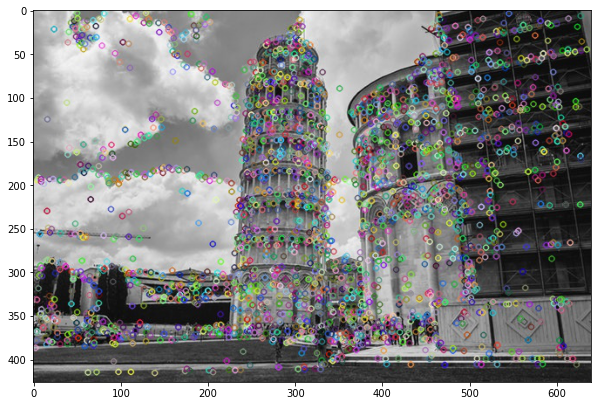

In [45]:
sift_pisa_keypoints = skimage.io.imread('sift_pisa_keypoints.jpg')

plt.figure(figsize = (10, 10))
plt.imshow(sift_pisa_keypoints, cmap = 'gray');

In [46]:
pisa_rich1 = cv2.drawKeypoints(gray1, keypoints1, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('rich_sift_pisa_keypoints.jpg', pisa_rich1)

True

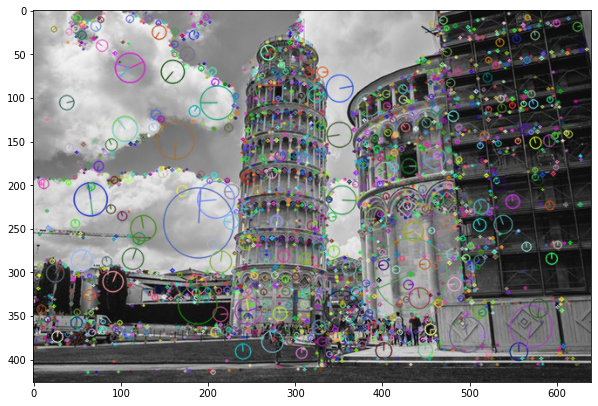

In [47]:
rich_sift_keypoints = skimage.io.imread('rich_sift_pisa_keypoints.jpg')

plt.figure(figsize = (10, 10))
plt.imshow(rich_sift_keypoints, cmap = 'gray');

In [48]:
kp1, des1 = sift.compute(gray1, keypoints1)

des1.shape

(2555, 128)

In [49]:
pisa2 = cv2.imread('datasets/leaning_pisa_2.jpg')

pisa2.shape

(426, 640, 3)

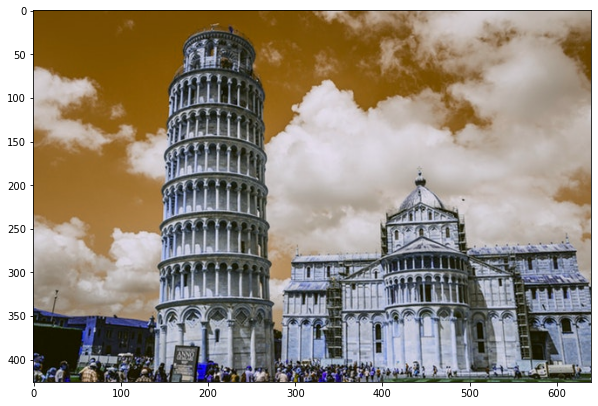

In [50]:
plt.figure(figsize=(10, 10))  

plt.imshow(pisa2);

In [51]:
gray2 = cv2.cvtColor(pisa2, cv2.COLOR_BGR2GRAY)

kp2, des2 = sift.detectAndCompute(gray2, None)

In [52]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

matches = bf.match(des1, des2)

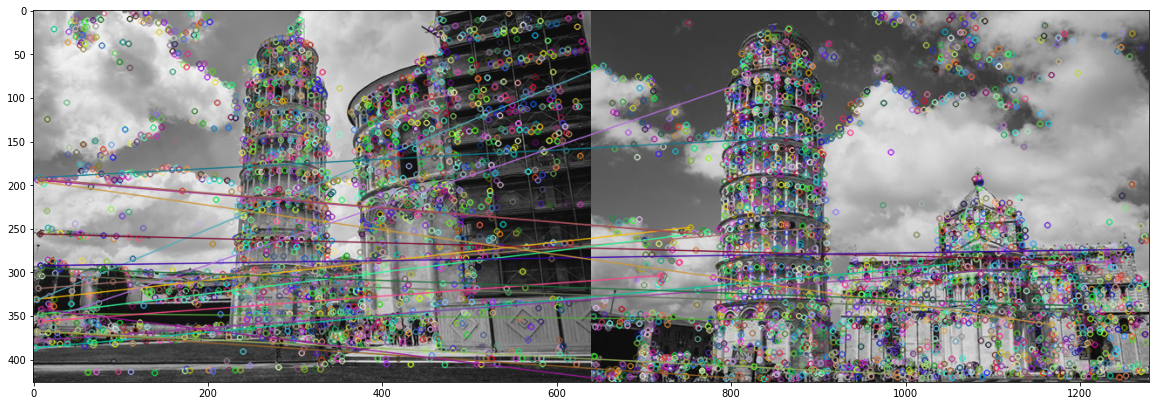

In [53]:
N_MATCHES = 20

match_img = cv2.drawMatches(
    gray1, kp1,
    gray2, kp2,
    matches[:N_MATCHES], gray2.copy(), flags=0)

plt.figure(figsize=(20, 10))
plt.imshow(match_img);